# Support Vector Machine

### SVM using Numpy and Matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

style.use('Solarize_Light2')

In [3]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, iterations=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.iterations = iterations

    def fit(self, data):
        X, y = data[:, :-1], data[:,-1]
        n_samples, n_features = X.shape
        y[y==0]=-1
        
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.iterations):
            for i in range(n_samples):
                if y[i] * (np.dot(X[i], self.w) - self.b) >= 1:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(X[i], y[i]))
                    self.b -= self.lr * y[i]


    def predict(self, X):
        return 1 if (np.dot(X, self.w) - self.b)>=0 else 0

    def visualize_svm(self ,train):
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]

        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(111)
        X = train[:,:-1]
        y = train[:,-1]
        plt.scatter(X[:,0], X[:,1], cmap='tab10', c=y, s=10)

        x01 = np.amin(X[:,0])
        x02 = np.amax(X[:,0])

        x11 = get_hyperplane_value(x01, self.w, self.b, 0)
        x12 = get_hyperplane_value(x02, self.w, self.b, 0)

        x11m = get_hyperplane_value(x01, self.w, self.b, -1)
        x12m = get_hyperplane_value(x02, self.w, self.b, -1)

        x11p = get_hyperplane_value(x01, self.w, self.b, 1)
        x12p = get_hyperplane_value(x02, self.w, self.b, 1)

        ax.plot([x01, x02],[x11, x12], 'y--')
        ax.plot([x01, x02],[x11m, x12m], 'k-')
        ax.plot([x01, x02],[x11p, x12p], 'k-')

        x1min = np.amin(X[:,1])
        x1max = np.amax(X[:,1])
        ax.set_ylim([x1min-3,x1max+3])

        plt.show()

In [4]:
def createData(seed = 0, mu = 1, sigma = 0.1, points=1000, factor1=25, factor2=25):
    if seed==0:
        np.random.seed(0)
    else:
        np.random.seed(-1)

    X1 = np.random.normal(mu*1.7, sigma, (points//2, 1)).ravel()*(factor1)
    Y1 = np.random.normal(mu*0.5, sigma, (points//2, 1)).ravel()*(factor1)

    X2 = np.random.normal(mu, sigma, (points//2, 1)).ravel()*(factor2)
    Y2 = np.random.normal(mu, sigma, (points//2, 1)).ravel()*(factor2)

    data = np.zeros((points, 3))

    data[:points//2, 0] = X1
    data[:points//2, 1] = Y1
    data[:points//2, 2] = 0

    data[points//2:, 0] = X2
    data[points//2:, 1] = Y2
    data[points//2:, 2] = 1

    return data

In [5]:
def saveData(data):
    columns = ["Feature"+str(i) for i in range(1,data.shape[1])]+ ["Label"]
    df = pd.DataFrame(data = data, columns = columns)
    df.to_csv("RandomDataSet.csv", index=False)

In [6]:
def readData(filename="RandomDataSet.csv"):
    df = pd.read_csv(filename)
    return df.to_numpy()

In [7]:
def plotData(data):
    plt.figure(figsize=(10,10))
    plt.scatter(data[:, 0], data[:, 1], c=data[:,2], cmap='tab10', s=10)
    plt.show()

In [8]:
def splitData(data, split_ratio = 1/3.0):
    split_term = int((split_ratio/2.0)*data.shape[0])
    train = data[split_term:-split_term]
    test = np.vstack([data[:split_term], data[-split_term:]])
    return train, test

In [9]:
def doPredict(model, testData, showStep = 30):
    testLabel = list(map(int, testData[:,-1]))
    predicted = [ model.predict(testData[i,:-1]) for i in range(len(testLabel)) ]
    return testLabel, predicted

In [10]:
def generateConfusionMatrix(testLabel, predicted):
    confusion = {'TP':0, 'TN':0, 'FP':0, 'FN':0}
    for i in range(len(predicted)):
        if testLabel[i] == 1 and predicted[i] == 1:
            confusion['TP']+=1
        elif testLabel[i] == 1 and predicted[i] == 0:
            confusion['FN']+=1
        elif testLabel[i] == 0 and predicted[i] == 1:
            confusion['FP']+=1
        else:
            confusion['TN']+=1
    return confusion

In [11]:
def showConfusionMatrix(testLabel, predicted):
    data = {'Actual Label': testLabel, 'Predicted Label': predicted}
    df = pd.DataFrame(data, columns=data.keys())
    confusion_matrix = pd.crosstab(df['Actual Label'], df['Predicted Label'], rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True)

In [12]:
def calculateMetrics(confusion):
    accuracy = (confusion['TP']+confusion['TN'])/sum(confusion.values())
    error_rate = 1-accuracy
    precision = confusion['TP']/(confusion['TP']+confusion['FP'])
    recall = confusion['TP']/(confusion['TP']+confusion['FN'])
    f1_score = 2*precision*recall/(precision+recall)
    print(f"Accuracy \t: {round(accuracy,4)}\nError Rate \t: {round(error_rate,4)}\nPrecision \t: {round(precision,4)}\nRecall  \t: {round(recall,4)}\nF1 Score \t: {round(f1_score,4)}")

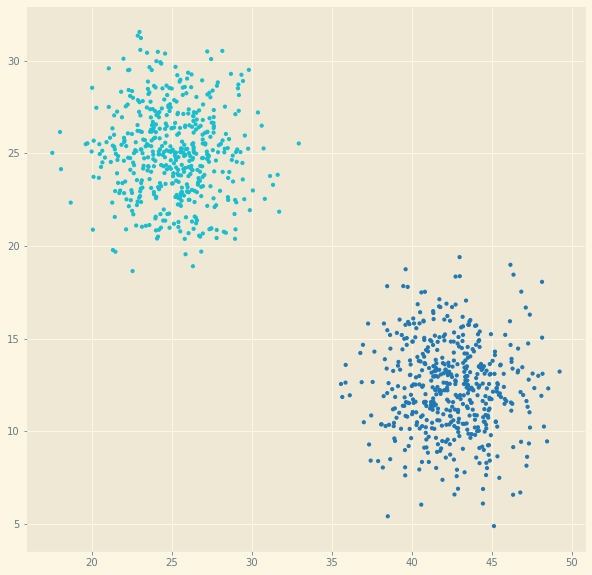

In [13]:
data = createData()
saveData(data)
data = readData("RandomDataSet.csv")
train, test = splitData(data)
plotData(data)

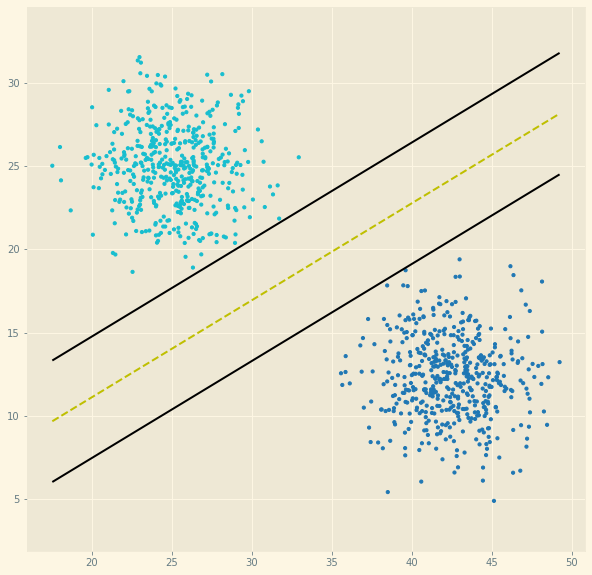

In [14]:
s = SVM()
s.fit(data)
s.visualize_svm(data)

In [15]:
testLabel, predicted = doPredict(s, test)

In [16]:
confusion = generateConfusionMatrix(testLabel, predicted)
print(confusion)

{'TP': 166, 'TN': 166, 'FP': 0, 'FN': 0}


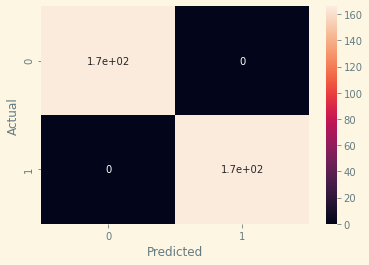

In [17]:
showConfusionMatrix(testLabel, predicted)

In [18]:
calculateMetrics(confusion)

Accuracy 	: 1.0
Error Rate 	: 0.0
Precision 	: 1.0
Recall  	: 1.0
F1 Score 	: 1.0


### SVM using Sklearn

In [20]:
from sklearn.svm import SVC
from sklearn.datasets.samples_generator import make_blobs

C:\Users\Anurag\AppData\Local\conda\conda\envs\apidb\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [21]:
def make_decision_func(model, axis=None, chart=True):
    if axis == None:
        axis = plt.gca()
    limit_x = axis.get_xlim()
    limit_y = axis.get_ylim()
    
    x = np.linspace(limit_x[0], limit_x[1], 50)
    y = np.linspace(limit_y[0], limit_y[1], 50)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    axis.contour(X, Y, P, colors=['k', 'y', 'k'], levels=[-1, 0, 1], alpha=0.5, linestyles=['-', '--', '-'])
    
    if chart:
        sv_text="Support Vectors:"
        for i in svm.support_vectors_:
            sv_text+="\n"+str(i).replace("[", "(").replace("]", ")").replace(" ",", ")
        axis.text(2.25, 5, sv_text, style='italic', bbox={'facecolor': 'red', 'alpha': 0.50, 'pad': 10}, fontsize=12)
        axis.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1],s=300, linewidth=1, facecolors='yellow');
        axis.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1],s=100, linewidth=1, facecolors='red');
    axis.set_xlim(limit_x)
    axis.set_ylim(limit_y)

In [22]:
def plot_svm(N=1000, ax=None):
    X, y = make_blobs(n_samples=1100, centers=2, random_state=0, cluster_std=0.40)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    sv_text=""
    for i in svm.support_vectors_:
        sv_text+="\n"+str(i).replace("[", "(").replace("]", ")").replace(" ",", ")

    ax.text(2.55, 5.5, "Support Vectors:"+sv_text, style='italic', bbox={'facecolor': 'red', 'alpha': 0.50, 'pad': 10}, fontsize=15)

    ax.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1],s=300, linewidth=1, facecolors='yellow');
    ax.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1],s=100, linewidth=1, facecolors='red');
    
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='tab10')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    make_decision_func(model, ax, chart=False)

In [23]:
X, y = make_blobs(n_samples=1000, centers=2, random_state=0, cluster_std=0.40)
svm = SVC(kernel='linear', C=1E10)
svm.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

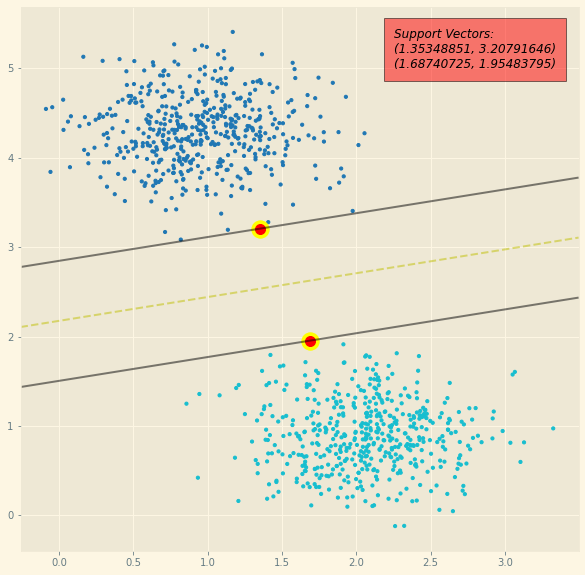

In [24]:
fig, ax = plt.subplots(1,figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='tab10')
make_decision_func(svm)

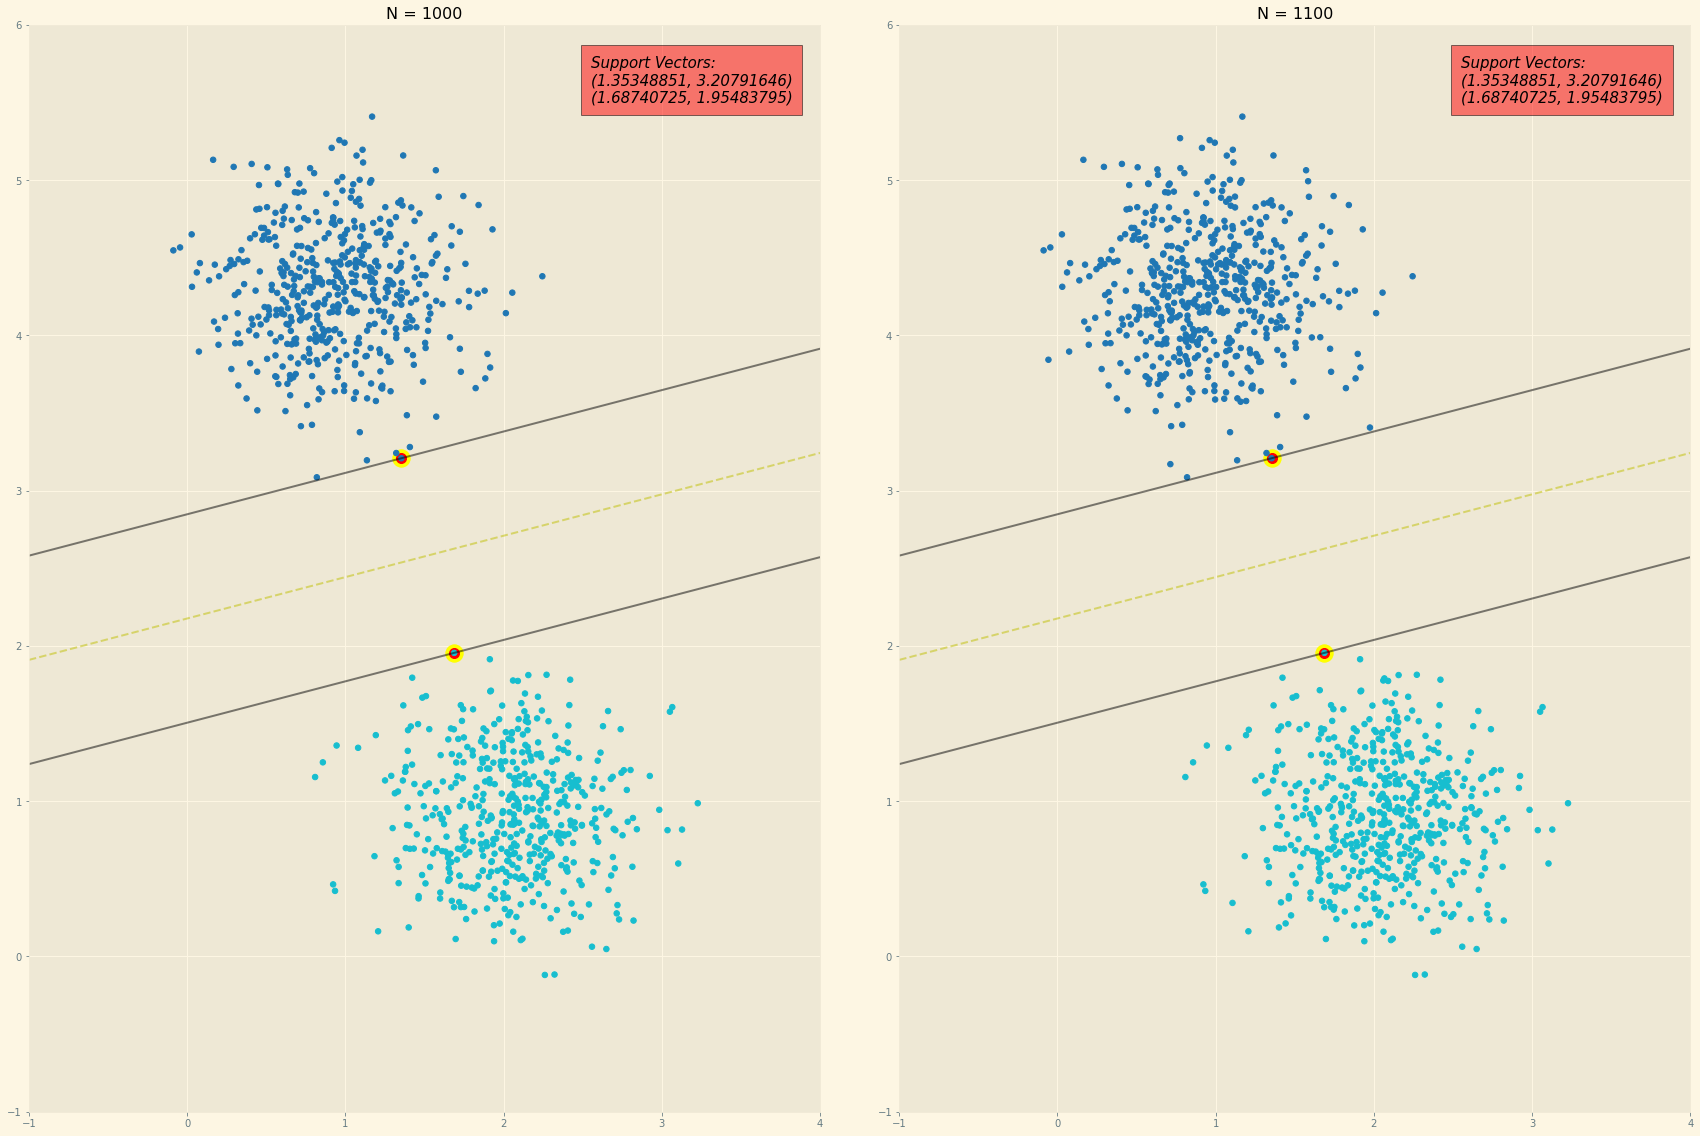

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(26, 20))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [1000, 1100]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))
plt.show()

The Above two graphs show that changing the other vectors in the dataset does not affect the support vectors.